In [1]:
!python datasets.py

In [20]:
import math
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as skl
import io
import pickle

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Lasso

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:


import datasets

DS = datasets.Datasets()



In [3]:
tweets = DS.tweets_df
retweets = DS.retweets_df

In [4]:
twitter = tweets.append(retweets)
twitter = twitter.fillna(0)

In [5]:
## import analysis. Maybe make into modules

In [6]:
twitter

,Unnamed: 0,Unnamed: 0.1,File Name,Candidate,Sentence,Propaganda Segments,Loaded_Language,"Name_Calling,Labeling",Repetition,"Exaggeration,Minimisation",...,Appeal_to_Authority,Black-and-White_Fallacy,Thought-terminating Cliches,"Whataboutism,Straw_Men,Red_Herring","Obfuscation,Intentional_Vagueness,Confusion","Bandwagon,Reductio_ad_hitlerum",Num Prop,Thought-terminating_Cliches,Content_Category,BCandidate
271,271,271.0,DT_tweets_102_1.txt,DT,THANK YOU Atlanta Georgia! Leaving for Nevada ...,Lets MAKE AMERICA SAFE AND GREAT AGAIN: Slogans,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,tweet,1
272,272,272.0,DT_tweets_104_7.txt,DT,Thank you Michigan! #VoteTrumpMITrump 35%Kasic...,Thank you Michigan: Slogans,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,tweet,1
273,273,273.0,DT_tweets_113_9.txt,DT,I only wish my wonderful father Fred gave me $...,"wonderful father: Name_Calling,Labeling, ""tota...",0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,tweet,1
274,274,274.0,DT_tweets_124_12.txt,DT,Why cant the leaders of the Republican Party s...,Why cant the leaders of the Republican Party s...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,tweet,1
275,275,275.0,DT_tweets_124_2.txt,DT,Thank you Massachusetts! #Trump2016 #SuperTues...,Thank you Massachusetts: Slogans,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,tweet,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4757,4757,4757.0,DT_retweets_25_4.txt,DT,@CLewandowski_: Massive crowd in Pensacola Flo...,Unbelievable: Loaded_Language,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,retweet,1
4758,4758,4758.0,DT_retweets_25_5.txt,DT,@ameriflames: @realDonaldTrump @CLewandowski_ ...,no one wants a Bush or a Clinton they want a s...,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,retweet,1
4759,4759,4759.0,DT_retweets_269_2.txt,DT,@angeloftruth11: Clinton says Trump is dangero...,"dangerous: Loaded_Language, ""Whos the one who ...",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,retweet,1
4760,4760,4760.0,DT_retweets_270_2.txt,DT,@Don_Vito_08: Thank You Mr. Trump for Standing...,Thank You Mr. Trump for Standing up for Our Co...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,retweet,1


In [7]:
import math
## maybe balance the number of tweets from each?
dfH = twitter.loc[twitter['Candidate']=='HC',:]
print("HC length: ",len(dfH))

dfT =twitter.loc[twitter['Candidate']=='DT',:]
print("DT length: ",len(dfT))

#print(.5*(len(dfT)/len(dfH))

df_new = twitter

#df_new = df.append(dfH)
df_new = df_new.append(dfH)
#df_new = df_new.append(dfH[:math.floor(len(dfH)*.33)])
print("DT length ratio: ",len(dfT)/len(df_new))

twitter = df_new

HC length:  1522
DT length:  3038
DT length ratio:  0.4995067412035515


In [94]:
##sum(list(twitter.loc[:,"Num Prop"]==0))## this confirms that there is always at least one instance of propaganda

0

In [8]:
from sklearn.model_selection import train_test_split

X = twitter.loc[:,'Loaded_Language':'Thought-terminating_Cliches',]
Y = twitter.loc[:,"BCandidate"]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2,shuffle=True)

In [9]:
X_train

,Loaded_Language,"Name_Calling,Labeling",Repetition,"Exaggeration,Minimisation",Doubt,Appeal_to_fear-prejudice,Flag-Waving,Causal_Oversimplification,Slogans,Appeal_to_Authority,Black-and-White_Fallacy,Thought-terminating Cliches,"Whataboutism,Straw_Men,Red_Herring","Obfuscation,Intentional_Vagueness,Confusion","Bandwagon,Reductio_ad_hitlerum",Num Prop,Thought-terminating_Cliches
1418,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1197,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3088,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2365,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2308,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2612,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3145,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2252,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.dummy import DummyRegressor

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('SVM', SVC(gamma='auto'))) 
models.append(('ETC', ExtraTreesClassifier(n_estimators=100, random_state=0)))
models.append(('RFC', RandomForestClassifier(max_depth= 2, random_state = 0)))  
models.append(('null0', DummyRegressor(strategy="constant", constant= 0)))
models.append(('null1', DummyRegressor(strategy="constant", constant= 1)))


results = []
names = []
roc_auc= []
fitted_mods=[]
conf_mat= []
predictions = []


for name, model in models: 
    print(model)
    print(name)
    fitted_mods.append(model.fit(X_train, Y_train))
 
    names.append(name)
    
for i in fitted_mods: 
	roc_auc.append(roc_auc_score(Y_test,i.predict(X_test)))
	results.append(accuracy_score(Y_test, i.predict(X_test)))

#	conf_mat.append(confusion_matrix(Y_test, i.predict(X_test)))
 
	predictions.append(i.predict(X_test))
 
#print(roc_auc)
print(results)
print(conf_mat)
print(predictions)

LogisticRegression(multi_class='ovr', solver='liblinear')
LR
ExtraTreesClassifier(random_state=0)
ETC
RandomForestClassifier(max_depth=2, random_state=0)
RFC
DummyRegressor(constant=0, strategy='constant')
null0
DummyRegressor(constant=1, strategy='constant')
null1
[0.6400986031224322, 0.647493837304848, 0.6253081347576006, 0.5094494658997535, 0.4905505341002465]
[]
[array([1, 0, 1, ..., 1, 0, 1], dtype=int64), array([1, 1, 1, ..., 1, 0, 1], dtype=int64), array([0, 1, 0, ..., 1, 0, 0], dtype=int64), array([0, 0, 0, ..., 0, 0, 0]), array([1, 1, 1, ..., 1, 1, 1])]


LR accuracy: 0.6400986031224322 roc auc: 0.6404360512238612
ETC accuracy: 0.647493837304848 roc auc: 0.649185443345761
RFC accuracy: 0.6253081347576006 roc auc: 0.623682930782947
null0 accuracy: 0.5094494658997535 roc auc: 0.5
null1 accuracy: 0.4905505341002465 roc auc: 0.5


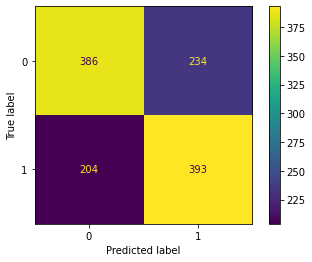

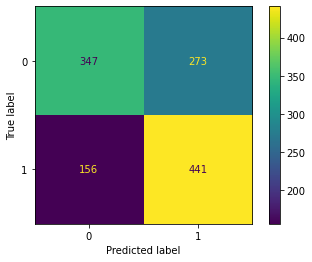

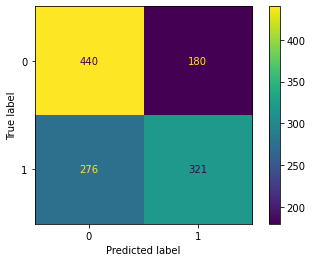

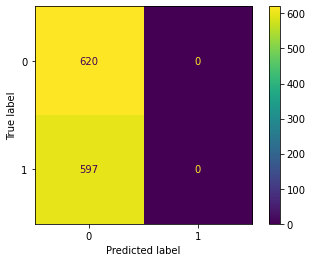

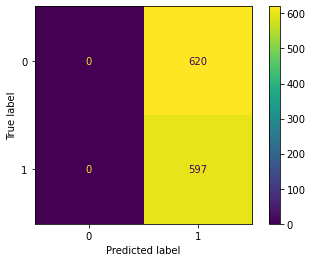

In [21]:
## printing imporant stats
for i in range(len(names)):
  print(names[i],'accuracy:' , results[i], 'roc auc:',roc_auc[i])
  cm = confusion_matrix(Y_test,predictions[i])
  ConfusionMatrixDisplay(cm).plot()

plt.show()

## cross validated gridsearches:

In [33]:
granularity1 = 10 ## make smaller when running on a more powerful computer

In [11]:
from sklearn.model_selection import GridSearchCV
# support vector machine

SVCCV = GridSearchCV(
SVC(gamma='auto'), param_grid = { 
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : list(range(1,30))


})

SVCCV.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [23]:
filename = 'SVC_GS_twitter'
pickle.dump(SVCCV, open(filename,'wb'))

In [24]:
##reading in trained model
loaded_model = pickle.load(open(filename, 'rb'))


In [26]:
print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))

SVC_GS results
roc_auc: 0.6539336467282649
accurarcy: 0.6507806080525883


## extra trees

In [34]:

ETCV = GridSearchCV(ExtraTreesClassifier(),param_grid = {
    'n_estimators' : list(range(1,100,granularity1)),# no real benefit from 1,100
    'random_state' : list(range(1,100,granularity1))
})

ETCV.fit(X_train,Y_train)

filename = 'extra_trees_GS_twitter'
pickle.dump(ETCV, open(filename,'wb')) 


In [31]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))

extra_trees_GS_twitter results on test data
roc_auc: 0.6475104014697142
accurarcy: 0.6458504519309778


## random forest

In [35]:
RFCV = GridSearchCV(RandomForestClassifier(), param_grid={ 
    'n_estimators' : list(range(1,100,granularity1)),
    'max_depth': list(range(2,100,granularity1)),
    'random_state': list(range(10,100,granularity1))

})
RFCV.fit(X_train,Y_train)

filename = 'RFCV_GS_twitter'
pickle.dump(RFCV, open(filename,'wb'))


In [36]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))

RFCV_GS_twitter results on test data
roc_auc: 0.6463013994704705
accurarcy: 0.6442070665571077


In [70]:
list(twitter.columns)[6:-2]#['Loaded_Language':'Thought-terminating_Cliches']

['Loaded_Language',
 'Name_Calling,Labeling',
 'Repetition',
 'Exaggeration,Minimisation',
 'Doubt',
 'Appeal_to_fear-prejudice',
 'Flag-Waving',
 'Causal_Oversimplification',
 'Slogans',
 'Appeal_to_Authority',
 'Black-and-White_Fallacy',
 'Thought-terminating Cliches',
 'Whataboutism,Straw_Men,Red_Herring',
 'Obfuscation,Intentional_Vagueness,Confusion',
 'Bandwagon,Reductio_ad_hitlerum',
 'Num Prop',
 'Thought-terminating_Cliches']

In [87]:
from sklearn.inspection import permutation_importance
    
scoring = ['accuracy', 'roc_auc']
r_multi = permutation_importance(
    RFCV, X_test, Y_test, n_repeats=30, random_state=0, scoring=scoring)
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        #if r.importances_mean[i] - 2 * r.importances_std[i] > 0: ## do we want to know this?
        print(f"    {list(twitter.columns)[6:-2][i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")



accuracy
    Repetition0.040 +/- 0.004
    Num Prop0.019 +/- 0.006
    Flag-Waving0.017 +/- 0.006
    Appeal_to_fear-prejudice0.013 +/- 0.004
    Slogans 0.008 +/- 0.003
    Loaded_Language0.006 +/- 0.005
    Black-and-White_Fallacy0.002 +/- 0.003
    Appeal_to_Authority0.002 +/- 0.002
    Name_Calling,Labeling0.002 +/- 0.004
    Exaggeration,Minimisation0.002 +/- 0.004
    Causal_Oversimplification0.001 +/- 0.002
    Whataboutism,Straw_Men,Red_Herring0.001 +/- 0.002
    Thought-terminating_Cliches0.000 +/- 0.002
    Bandwagon,Reductio_ad_hitlerum0.000 +/- 0.001
    Thought-terminating Cliches0.000 +/- 0.000
    Obfuscation,Intentional_Vagueness,Confusion0.000 +/- 0.000
    Doubt   -0.000 +/- 0.000
roc_auc
    Repetition0.050 +/- 0.008
    Num Prop0.039 +/- 0.009
    Flag-Waving0.031 +/- 0.006
    Appeal_to_fear-prejudice0.022 +/- 0.005
    Exaggeration,Minimisation0.004 +/- 0.002
    Whataboutism,Straw_Men,Red_Herring0.004 +/- 0.002
    Black-and-White_Fallacy0.003 +/- 0.003
    Appea

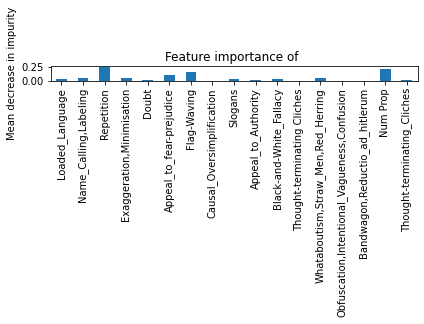

In [73]:
#importance
importances= RFCV.best_estimator_.feature_importances_
#std = np.std([tree.feature_importances_ for tree in fitted_mods[2].estimators_], axis=0)
std = np.std([RFCV.best_estimator_.feature_importances_ for tree in fitted_mods[2].estimators_], axis=0)

forest_importances = pd.Series(importances, index = list(twitter.columns)[6:-2] )

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importance of Random Forest ")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

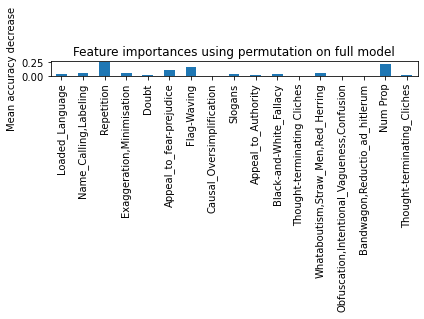

In [76]:
fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## lasso

In [37]:
LOCV = GridSearchCV( linear_model.Lasso(), param_grid={ 
    'alpha' : list(np.arange (.1, 50, .1))

})
LOCV.fit(X_train,Y_train)

filename = 'lasso_GS_twitter'
pickle.dump(LOCV, open(filename,'wb')) 

In [38]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))

lasso_GS_twitter results on test data
roc_auc: 0.6475104014697142
accurarcy: 0.6458504519309778


## neural net

In [39]:
NNCV = GridSearchCV( MLPClassifier(), param_grid={ 
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha' : [1e-5,1e-4,1e-3,1e-2]
    

})
NNCV.fit(X_train,Y_train)

filename = 'NNCV_GS_twitter'
pickle.dump(NNCV, open(filename,'wb'))

NameError: name 'MLPClassifier' is not defined

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))

In [13]:
## when saving the models create Twitter_model_results_mod

In [14]:

#models.append(('LASSO', linear_model.Lasso(alpha=.1)))## this doesn't play nicely with my loop